In [218]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [219]:
regions = [47, 50, 77, 78]
estate = []
for region in regions:
    estate.append(pd.read_csv('futureEstate_{}region.csv'.format(region)))
estate = pd.concat(estate)

In [220]:
estate.to_csv('estate.csv', index=False)

In [238]:
estate.head(5)

,id,region,address,developer,lat,lon,class_desc,plan_ready100perc_date,floors,flats,square,object_problem,wall_material,infrastructure_index,parking_count,energy_eff,price_avg,ceiling_height,guest_parking_count,transport_dist_index
0,23064,47,"г Сосновый Бор, Улица Парковая, д. 6",16 КВАРТАЛ,59.9079,29.0796,Типовой,2019-06-19,19.0,766.0,39881.63,0,Панель,7,0.0,B,89137.468582,NaN,NaN,NaN
1,26500,47,"д Большие Томики, улица Воскресенская, блок-се...",47 ТРЕСТ,59.7764,30.0273,Комфорт,2020-05-15,2.0,18.0,1764.78,0,Другое,2,0.0,C,89137.468582,NaN,NaN,NaN
2,26663,47,"п Аннино, ул. 10-й Пятилетки",47 ТРЕСТ,59.7726,30.0492,Комфорт,2019-10-07,10.0,234.0,9241.75,0,Монолит-кирпич,2,0.0,C,60001.000000,NaN,NaN,NaN
3,21002,47,"г Всеволожск, улица Коралловская, д. 1",4Д КОНСТРАКШН,60.0202,30.6510,Комфорт,2021-08-23,7.0,55.0,2780.60,0,Монолит-кирпич,7,28.0,B,69838.000000,"2,7",7.0,NaN
4,21001,47,"г Всеволожск, улица Коралловская, д. 1",4Д КОНСТРАКШН,60.0203,30.6507,Комфорт,2021-08-23,7.0,60.0,2959.40,0,Монолит-кирпич,7,40.0,B,73728.000000,"2,7",7.0,NaN


In [139]:
estate.describe()

,id,region,lat,lon,floors,flats,square,object_problem,infrastructure_index,parking_count,price_avg,guest_parking_count,transport_dist_index
count,6730.000000,6730.000000,6730.000000,6730.000000,6595.000000,6724.000000,6730.000000,6730.0,6730.000000,6714.000000,4.688000e+03,4336.000000,3273.000000
mean,24965.542942,64.404012,57.270387,34.890374,13.745262,283.555175,13758.678493,0.0,5.578603,60.512958,1.374620e+05,48.481780,5.084937
std,12354.040372,14.119959,2.037627,3.475775,9.571420,342.937352,16395.466998,0.0,2.892098,162.312330,1.212801e+05,91.460777,2.810236
min,7.000000,47.000000,54.834700,28.229200,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.063000e+03,0.000000,1.000000
25%,14614.250000,50.000000,55.669825,30.438425,5.000000,32.000000,1640.900000,0.0,3.000000,0.000000,7.549125e+04,0.000000,3.000000
50%,25514.500000,77.000000,55.859050,37.277200,13.000000,180.000000,9126.375000,0.0,6.000000,0.000000,1.099800e+05,18.000000,5.000000
75%,35302.750000,77.000000,59.860600,37.623575,20.000000,396.000000,18789.642500,0.0,8.000000,0.000000,1.605155e+05,57.000000,7.000000
max,45865.000000,78.000000,61.041600,39.542000,76.000000,2879.000000,142978.700000,0.0,10.000000,2876.000000,1.867937e+06,1000.000000,10.000000


In [140]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 1649
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6730 non-null   int64  
 1   region                  6730 non-null   int64  
 2   address                 6730 non-null   object 
 3   developer               6730 non-null   object 
 4   lat                     6730 non-null   float64
 5   lon                     6730 non-null   float64
 6   class_desc              6730 non-null   object 
 7   plan_ready100perc_date  6705 non-null   object 
 8   floors                  6595 non-null   float64
 9   flats                   6724 non-null   float64
 10  square                  6730 non-null   float64
 11  object_problem          6730 non-null   int64  
 12  wall_material           6730 non-null   object 
 13  infrastructure_index    6730 non-null   int64  
 14  parking_count           6714 non-null   

In [141]:
estate.groupby('region').size()

region
47     826
50    2283
77    1971
78    1650
dtype: int64

In [142]:
estate['parking_count'] = estate['parking_count'].fillna(0) + estate['guest_parking_count'].fillna(0)

In [143]:
estate = estate.replace('-', np.NaN)
estate = estate.drop(['ceiling_height', 'guest_parking_count', 'transport_dist_index', 'object_problem'], axis=1)

In [171]:
estate['plan_ready100perc_date'] = pd.to_datetime(estate['plan_ready100perc_date'])

In [172]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 1649
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      6730 non-null   int64         
 1   region                  6730 non-null   int64         
 2   address                 6730 non-null   object        
 3   developer               6730 non-null   object        
 4   lat                     6730 non-null   float64       
 5   lon                     6730 non-null   float64       
 6   class_desc              6730 non-null   object        
 7   plan_ready100perc_date  6705 non-null   datetime64[ns]
 8   floors                  6595 non-null   float64       
 9   flats                   6724 non-null   float64       
 10  square                  6730 non-null   float64       
 11  wall_material           6730 non-null   object        
 12  infrastructure_index    6730 non-null   int64   

In [173]:
region_mean_price = estate.groupby('region')['price_avg'].mean().reset_index()

Text(0.5, 1.0, 'Цена за квадратный метр квартиры в двух крупнейших агломерациях (руб)')

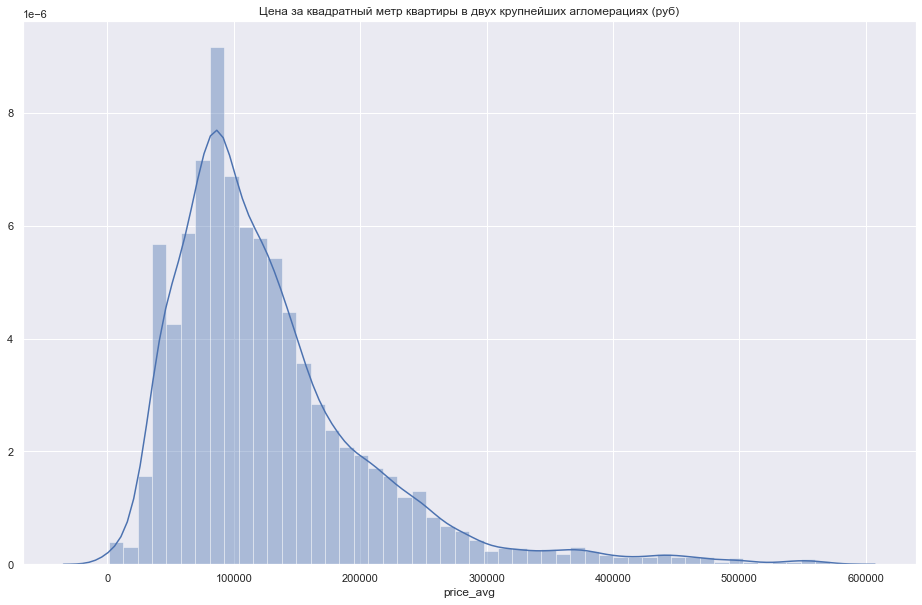

In [174]:
sns.set(rc={'figure.figsize':(16,10)})
sns.distplot(estate[estate['price_avg']<600000]['price_avg']).set_title('Цена за квадратный метр квартиры в двух крупнейших агломерациях (руб)')

Text(0.5, 1.0, 'Класс энергоэффективности здания')

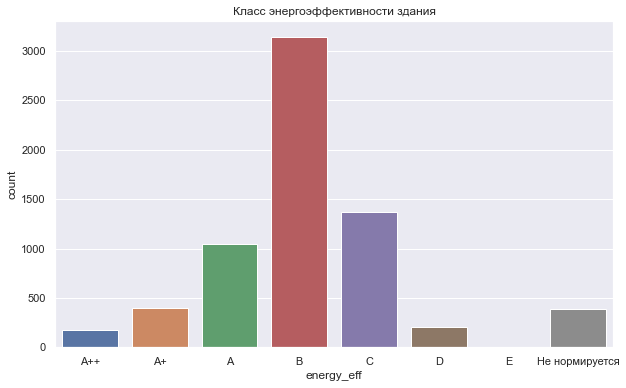

In [175]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(estate['energy_eff'], order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'Не нормируется']).set_title('Класс энергоэффективности здания')

Text(0.5, 1.0, 'Класс энергоэффективности и цена за квадратный метр')

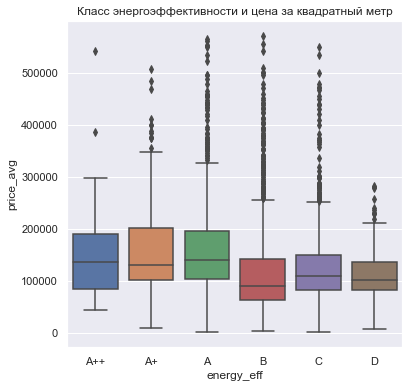

In [213]:
sns.boxplot(x ='energy_eff', 
            y ='price_avg', 
            data = estate[(estate['price_avg'] < 600000) & (estate['energy_eff'].isin(['A++', 'A+', 'A', 'B', 'C', 'D']))], 
            order = ['A++', 'A+', 'A', 'B', 'C', 'D']).set_title('Класс энергоэффективности и цена за квадратный метр')

Text(0.5, 1.0, 'Класс здания и цена за квадратный метр')

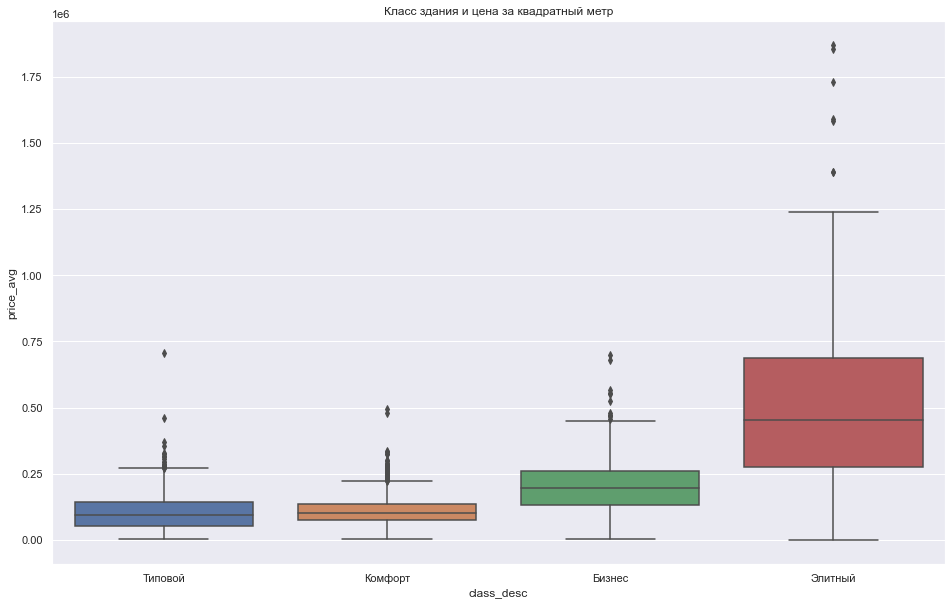

In [228]:
sns.boxplot(x ='class_desc', 
            y ='price_avg', 
            data = estate[estate['class_desc'] != 'Другое'], 
            order = ['Типовой', 'Комфорт', 'Бизнес', 'Элитный']).set_title('Класс здания и цена за квадратный метр')

Text(0.5, 1.0, 'Класс здания и этажность по регионам')

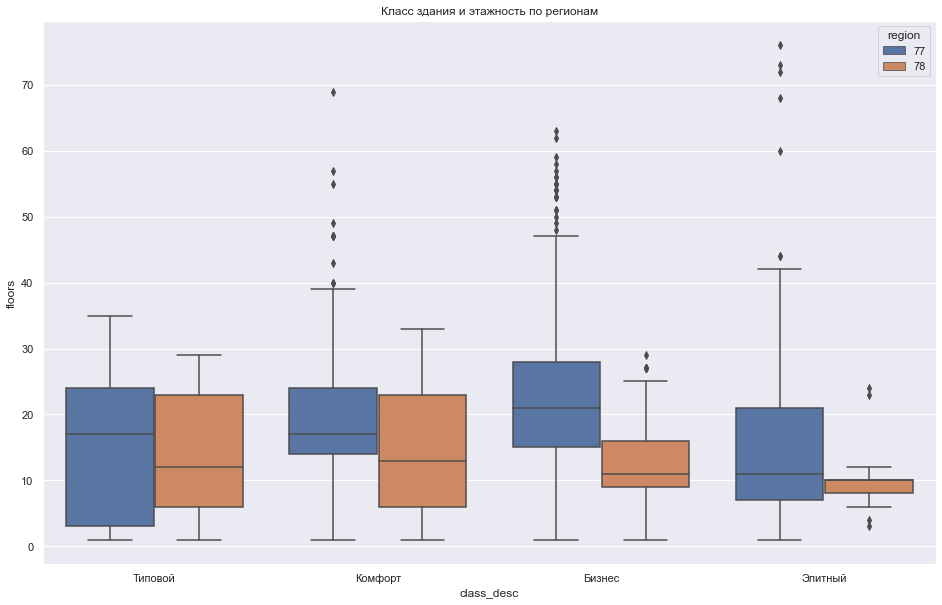

In [236]:
sns.boxplot(x ='class_desc', 
            y ='floors', 
            data = estate[(estate['class_desc'] != 'Другое') & (estate['region'].isin([78,77]))],
            hue="region",
            order = ['Типовой', 'Комфорт', 'Бизнес', 'Элитный']).set_title('Класс здания и этажность по регионам')

Text(0.5, 1.0, 'Класс здания и этажность в Москве')

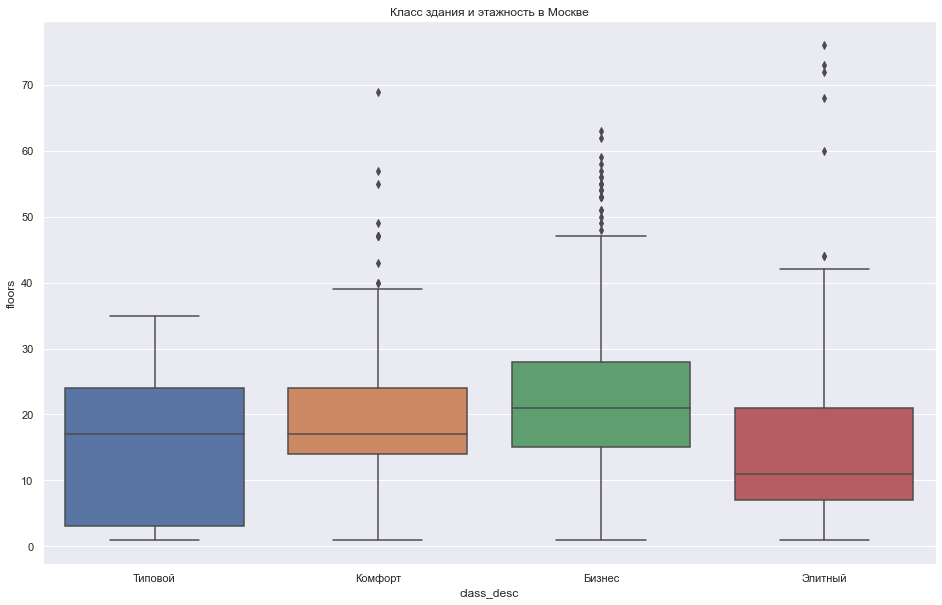

In [233]:
sns.boxplot(x ='class_desc', 
            y ='floors', 
            data = estate[(estate['class_desc'] != 'Другое') & (estate['region'] == 77)], 
            order = ['Типовой', 'Комфорт', 'Бизнес', 'Элитный']).set_title('Класс здания и этажность в Москве')

Text(0.5, 1.0, 'Класс здания и этажность в Петербурге')

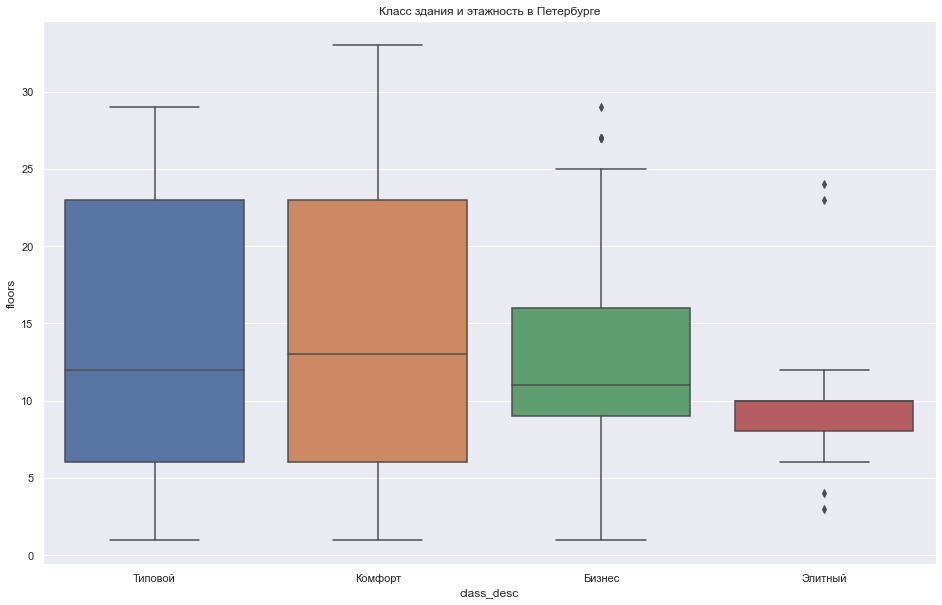

In [234]:
sns.boxplot(x ='class_desc', 
            y ='floors', 
            data = estate[(estate['class_desc'] != 'Другое') & (estate['region'] == 78)], 
            order = ['Типовой', 'Комфорт', 'Бизнес', 'Элитный']).set_title('Класс здания и этажность в Петербурге')

Text(0.5, 1.0, 'Регионы')

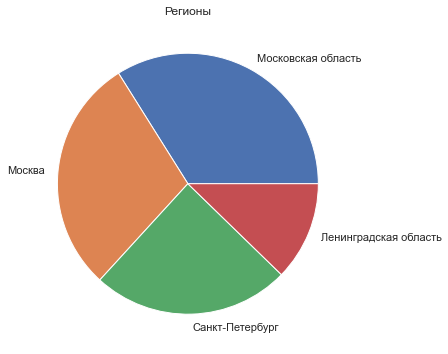

In [194]:
plt.pie(estate['region'].value_counts(), labels = ['Московская область', 'Москва', 'Санкт-Петербург', 'Ленинградская область'])
plt.title('Регионы')

In [192]:
estate['region'].value_counts()

50    2283
77    1971
78    1650
47     826
Name: region, dtype: int64

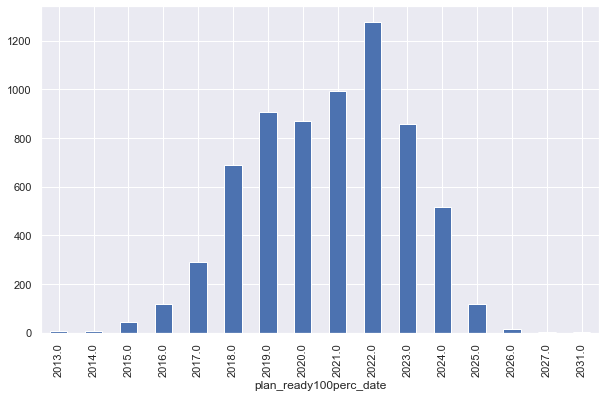

In [183]:
estate.groupby(estate["plan_ready100perc_date"].dt.year).size().plot(kind="bar")

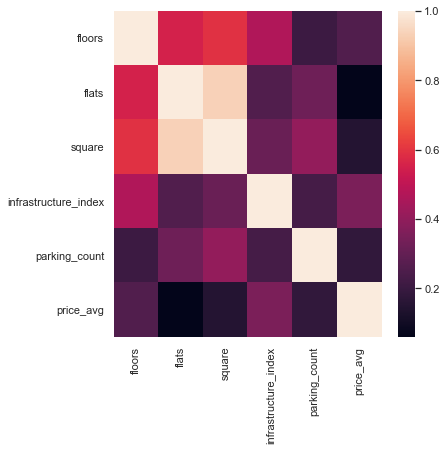

In [203]:
sns.set(rc={'figure.figsize':(6,6)})
sns.heatmap(estate.drop(['id', 'region', 'lat', 'lon'], axis=1).corr())

Text(0.5, 1.0, 'Регион и этажность')

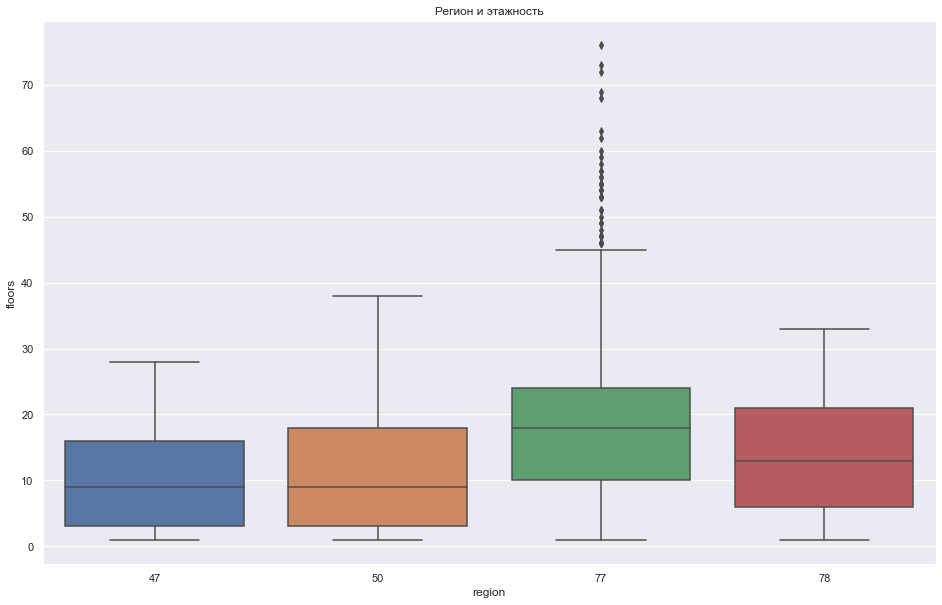

In [217]:
sns.boxplot(x ='region', y ='floors', data = estate).set_title('Регион и этажность')

Text(0.5, 1.0, 'Зависимость между этажностью и ценой')

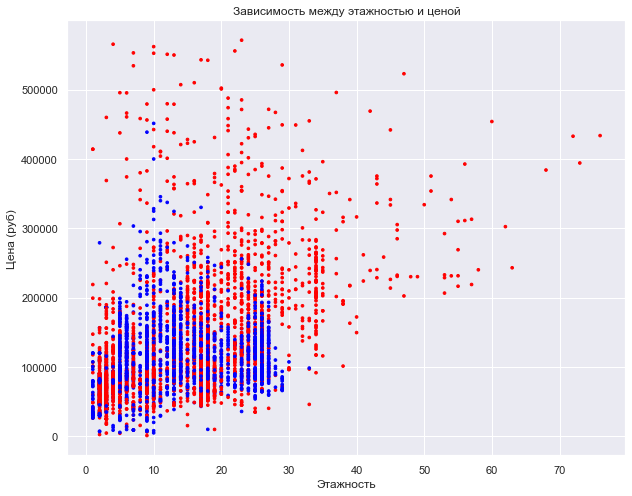

In [198]:
plt.figure(figsize=(10, 8))
plt.scatter(estate[estate['price_avg']<600000]['floors'], estate[estate['price_avg']<600000]['price_avg'], 
            s=7, color=estate[estate['price_avg']<600000]['region'].map({78: 'blue', 77: 'red', 50: 'red', 47: 'blue'}))
plt.xlabel('Этажность')
plt.ylabel('Цена (руб)')
plt.title('Зависимость между этажностью и ценой')

Text(0.5, 1.0, 'Регион и цена за квадратный метр')

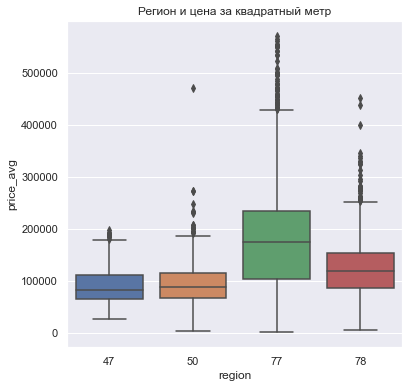

In [209]:
sns.boxplot(x ='region', y ='price_avg', data = estate[(estate['price_avg'] < 600000)]).set_title('Регион и цена за квадратный метр')